# Shepp Logan Phantom Datasets

```bash
python3 -m venv venv
source ./venv/bin/activate
pip install -U git+https://github.com/Masterpiece-Image/Artifactors.git
pip install -U git+https://github.com/Masterpiece-Image/lasp.git
```

In [6]:
import numpy
import numpy.random
import random
import matplotlib.pyplot
import typing
import pathlib

In [7]:
from Artifactors.generator import \
    (
        add_artifacts_with_quantization,
        add_artifacts_with_svd
    )

from lasp.noise import additive_white_gaussian_noise as awgn

In [8]:
DATASET_PATH = pathlib.Path('./shepp_logan_phantom')
ARTIFACTS = DATASET_PATH / 'Artifacts'
RESULTS = DATASET_PATH / 'Results'

if not DATASET_PATH.exists():
    DATASET_PATH.mkdir()
    ARTIFACTS.mkdir()
    RESULTS.mkdir()

In [9]:
def make_patch_noised(
    image: numpy.ndarray, 
    start_point: tuple[int, int], 
    patch_dim: tuple[int, int],
    method: typing.Callable[[numpy.ndarray], numpy.ndarray]
) -> numpy.ndarray :

    a, b = image.shape
    x, y = start_point
    u, v = patch_dim
    patch = image[x:min(x+u, a), y:min(y+v, b)]

    patch = method(patch)

    return image

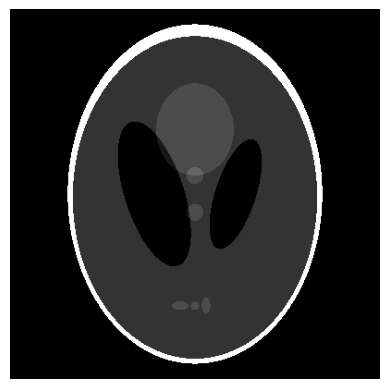

In [10]:
phantom = numpy.array(numpy.load('phantom.npy'))
x_lim, y_lim = phantom.shape
matplotlib.pyplot.axis('off')
matplotlib.pyplot.imshow(phantom, cmap='gray')
matplotlib.pyplot.imsave('phantom.png', phantom, cmap='gray')
matplotlib.pyplot.show()

## PATCH METHOD

### Quantization

In [ ]:
# Generation parameters
NUMBER_SAMPLE = 100
MAX_PATCH_SIZE = 50
INTENSITY_MIN = 0
INTENSITY_MAX = 99

# Noise parameters
PERCENT_AWGN = 0.5 # %
SNR_MIN = 0 # dB
SNR_MAX = 30 # dB


nb_awgn = int(PERCENT_AWGN*NUMBER_SAMPLE)

for i in range(0, NUMBER_SAMPLE):
    
    copy = numpy.copy(phantom)

    # Rect
    u, v = numpy.random.randint(0, MAX_PATCH_SIZE, size=2)
    x = numpy.random.randint(0, x_lim-1-u)
    y = numpy.random.randint(0, y_lim-1-v)

    # # Square
    # u = numpy.random.randint(0, MAX_PATCH_SIZE)
    # v = u
    # x = numpy.random.randint(0, x_lim-1-u)
    # y = numpy.random.randint(0, y_lim-1-u)

    intensity = random.randint(INTENSITY_MIN, INTENSITY_MAX)
    lambda_method = lambda image : add_artifacts_with_quantization(image, intensity)

    copy = make_patch_noised(copy, start_point=(x, y), patch_dim=(u, v), method=lambda_method)

    name = 'quant_patch_{}_{}'.format(i, intensity) 

    if i < nb_awgn:
        snr = numpy.random.randint(SNR_MIN, SNR_MAX)
        copy = awgn(copy, snr)
        name = name+'_{}'.format(snr)

    # # Save with numpy
    # numpy.save(ARTIFACTS / name, copy)
    # numpy.save(RESULTS / name, copy)

    # Save with matplot
    name = name+'.png'
    matplotlib.pyplot.imsave(ARTIFACTS / name, copy, cmap='gray')
    matplotlib.pyplot.imsave(RESULTS / name, phantom, cmap='gray')

### SVD

In [ ]:
# Generation parameters
NUMBER_SAMPLE = 100
MAX_PATCH_SIZE = 50
INTENSITY_MIN = 0
INTENSITY_MAX = 0.5

# Noise parameters
PERCENT_AWGN = 0.5 # %
SNR_MIN = 0 # dB
SNR_MAX = 30 # dB


nb_awgn = int(PERCENT_AWGN*NUMBER_SAMPLE)

for i in range(0, NUMBER_SAMPLE):
    
    copy = numpy.copy(phantom)

    # Rect
    u, v = numpy.random.randint(0, MAX_PATCH_SIZE, size=2)
    x = numpy.random.randint(0, x_lim-1-u)
    y = numpy.random.randint(0, y_lim-1-v)

    # # Square
    # u = numpy.random.randint(0, MAX_PATCH_SIZE)
    # v = u
    # x = numpy.random.randint(0, x_lim-1-u)
    # y = numpy.random.randint(0, y_lim-1-u)

    intensity = random.uniform(INTENSITY_MIN, INTENSITY_MAX)
    lambda_method = lambda image : add_artifacts_with_svd(image, intensity)

    copy = make_patch_noised(copy, start_point=(x, y), patch_dim=(u, v), method=lambda_method)

    name = 'svd_patch_{}_{}'.format(i, intensity) 

    if i < nb_awgn:
        snr = numpy.random.randint(SNR_MIN, SNR_MAX)
        copy = awgn(copy, snr)
        name = name+'_{}'.format(snr)

    # # Save with numpy
    # numpy.save(ARTIFACTS / name, copy)
    # numpy.save(RESULTS / name, copy)

    # Save with matplot
    name = name+'.png'
    matplotlib.pyplot.imsave(ARTIFACTS / name, copy, cmap='gray')
    matplotlib.pyplot.imsave(RESULTS / name, phantom, cmap='gray')

## Whole image

### Quantization

In [ ]:
# Generation parameters
NUMBER_SAMPLE = 100
INTENSITY_MIN = 0
INTENSITY_MAX = 99


# Noise parameters
PERCENT_AWGN = 0.5 # %
SNR_MIN = 0 # dB
SNR_MAX = 30 # dB


nb_awgn = int(PERCENT_AWGN*NUMBER_SAMPLE)

for i in range(0, NUMBER_SAMPLE):

    copy = numpy.copy(phantom)
    intensity = random.uniform(INTENSITY_MIN, INTENSITY_MAX)
    copy = add_artifacts_with_quantization(copy, intensity)

    name = 'quant_{}_{}'.format(i, intensity) 
    # if i < nb_awgn:
    #     snr = numpy.random.randint(SNR_MIN, SNR_MAX)
    #     copy = awgn(copy, snr)
    #     name = name+'_{}'.format(snr)

    # # Save with numpy
    # numpy.save(ARTIFACTS / name, copy)
    # numpy.save(RESULTS / name, copy)

    # Save with matplot
    name = name+'.png'
    matplotlib.pyplot.imsave(ARTIFACTS / name, copy, cmap='gray')
    matplotlib.pyplot.imsave(RESULTS / name, phantom, cmap='gray')

### SVD

In [11]:
NUMBER_SAMPLE = 5
INTENSITY_MIN = 0.
INTENSITY_MAX = 0.3

# Noise parameters
PERCENT_AWGN = 0.5 # %
SNR_MIN = 0 # dB
SNR_MAX = 30 # dB


nb_awgn = int(PERCENT_AWGN*NUMBER_SAMPLE)

for i in range(0, NUMBER_SAMPLE):

    copy = numpy.copy(phantom)
    intensity =  random.uniform(INTENSITY_MIN, INTENSITY_MAX)
    copy = add_artifacts_with_svd(copy, intensity)
    
    name = 'svd_{}_{}'.format(i, intensity) 
    if i < nb_awgn:
        snr = numpy.random.randint(SNR_MIN, SNR_MAX)
        copy = awgn(copy, snr)
        name = name+'_{}'.format(snr)

    # # Save with numpy
    # numpy.save(ARTIFACTS / name, copy)
    # numpy.save(RESULTS / name, copy)

    # Save with matplot
    name = name+'.png'
    matplotlib.pyplot.imsave(ARTIFACTS / name, copy, cmap='gray')
    matplotlib.pyplot.imsave(RESULTS / name, phantom, cmap='gray')